# Uge 7: Riemann-Integraler i 1D og 2D

Demo af Karl Johan Funch Måstrup Kristensen, Magnus Troen og Jakob Lemvig

In [1]:
from sympy import *
from dtumathtools import *

init_printing()

I skal nu til at integrere. Og i mange henseender kommer SymPy til være en god hjælp. SymPy's $\verb|integrate()|$-funktion tager hånd om mange integraler, men I vil ofte opleve tidspunkter hvor $\verb|integrate()|$ har svært ved at knække et integral og I skal udnytte jeres egen viden fra undervisningen til at gøre udtrykket spiseligt for SymPy. Nogen gange trænger SymPy til at få skåret tingene ud i mindre bidder, så den ikke bliver kvalt.

## Integration i en dimension

Helt simpelt regnes stamfunktioner i SymPy ved $\verb|integrate(f, var)|$. $\verb|var|$ kan udelades i tilfælde hvor funktionen kun har en variabel, men lige så snart der begynder at optræde flere variable (eller symboler defineret med $\verb|symbols()|$) skal man definere hvilken variabel man vil integrere efter.

Betragt for eksempel funktionen $f:\mathbb{R} \to \mathbb{R}$ givet ved

\begin{equation*}
f(x) = e^x \sin(x)
\end{equation*}

vi finder stamfunktionen

\begin{equation*}
F(x) = \int f(x)\; dx = \int e^x \sin(x)\; dx
\end{equation*}

In [2]:
x = symbols("x", real=True)
f = sqrt(1 - x**2)
f

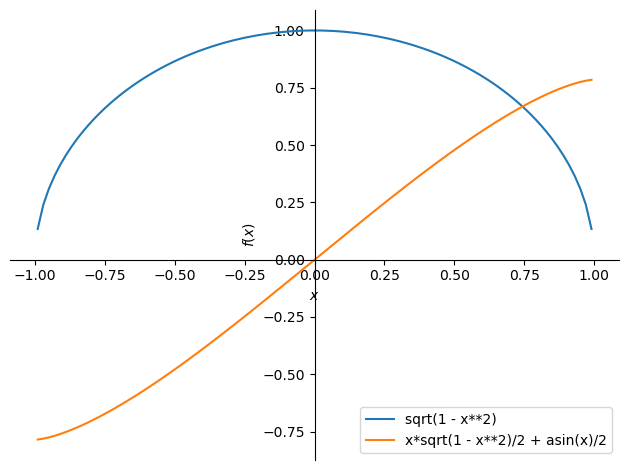

In [3]:
F = integrate(f, x)  # Technically the x is implicit here so integrate(f) would also work
plot(f, F, legend=True)

Bemærk dog at SymPy ikke tilføjer et konstant led efter den har integreret

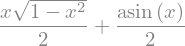

In [4]:
F

og en konstant skal derfor tilføjes manuelt, hvis man i en opgave bliver bedt om at angive stamfunktionen

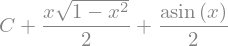

In [5]:
C = symbols('C')

F = integrate(f, x) + C
F

Skal man finde det bestemte integral

\begin{equation*}
\int_{a}^b f(x)\; dx = F(b) - F(a)
\end{equation*}

kan gøre brug af stamfunktionen, som vist ovenfor, og/eller få SymPy til det med $\verb|integrate(f, (var, a, b))|$. Givet for eksempel for Riemann-integralet

\begin{equation*}
\int_{-1}^1 f(x)\; dx
\end{equation*}

In [6]:
# Simulated calculation by hand using the fundamental theorem of calculus
display(F.subs(x, 1) - F.subs(x, -1))

# SymPy's integrate function
integrate(f, (x, -1, 1))

## Integration i flere dimensioner

For funktioner af flere variable vil det bestemte integral

\begin{equation*}
\int\int f(x_1, x_2)\; dx_1 \; dx_2
\end{equation*}

kunne findes i SymPy med

```python
integrate(f, x1, x2)
```

og for bestemte integraler tilføjes grænserne i `tuples` ligesom i integralet for en dimension

\begin{equation*}
\int_{a_1}^{b_1}\int_{a_2}^{b_2} f(x_1, x_2)\; dx_1 \; dx_2
\end{equation*}

```python
integrate(f, (x1, a1, b1), (x2, a2, b2))
```

Se eksempelvis på funktionen

In [7]:
x1, x2 = symbols('x1 x2')
f2 = (x1*x2)**3 - x1**2 + sin(3 * x2) + x1*x2**2 + 4
f2

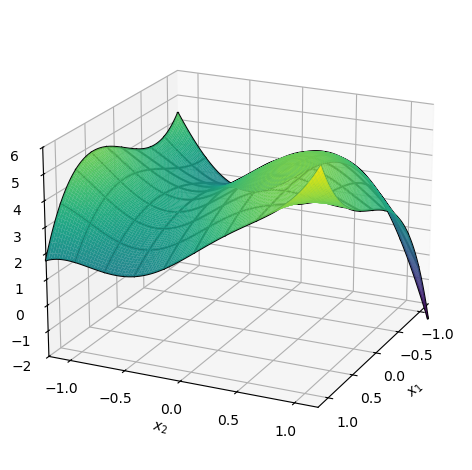

In [8]:
p = dtuplot.plot3d(f2, (x1, -1.2, 1.2), (x2, -1.2, 1.2), zlim=(-2, 6), use_cm=True, colorbar=False,
                   camera = {'azim': 25, 'elev': 20}, wireframe=True, show=False)

p.show()

Stamfunktionen kan findes med

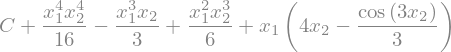

In [9]:
integrate(f2, x1, x2) + C

og et bestemt volume under grafen findes ved det bestemte integral

In [10]:
integrate(f2, (x1, -1.2, 1.2), (x2, -1.2, 1.2))

## Tips og tricks til at få Sympy til at integrere

Når `SymPy` giver problemer med et integral, er der nogle tricks der ofte kan hjælpe.

### Definér variable med constraints

Sørg for at angive information om de variable I definerer. Er det for eksempel en reel variabel? Så fortæl det til SymPy. De mest hyppige angivelser er 

- `real = True` 
- `positive = True` 
- `negative = True` 
- `nonnegative = True`
- `nonzero = True`

Nogle eksempler kunne være:

In [11]:
x1 = symbols('x1', real = True, nonnegative = True) # x1 er reel og ikke-negativ
x2 = symbols('x2', nonzero = True) # x2 er forskellig fra nul

### Simplificér før intration

Kald `simplify` på integranden før der integreres. Dette kan i mange tilfælde nedsætte tiden det kræver at få `SymPy` til at integrere.

Work flowet bør se sådan ud:

In [12]:
f = 1 / (x1 + x2)

integrand = simplify(f)
F = integrate(integrand, x1, x2)
F

### Anvend integralers linearitet

Anvend integralers linearitet. Hvis I skal integrere udtrykket

\begin{equation*}
\int_{c}^{d}\int_{a}^{b} \alpha f_1(x_1,x_2) + \beta f_2(x_1,x_2) \:dxdy
\end{equation*}

Vil det ofte være en fordel at arbejde med 

\end{equation*}
\alpha \int_{c}^d\int_{a}^{b} f_1(x_1,x_2) dxdy + \beta \int_{c}^{d}\int_{a}^{b} f_2(x_1,x_2)dxdy
\end{equation*}

Et eksempel kunne være

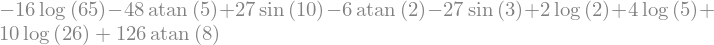

In [13]:
a = 3
b = 10
c = 2
d = 5
f = S(27)/3 * cos(x1) - 4 * atan(x2 -x1)

integrand1 = simplify(cos(x1)) # Her er det ikke nødvendigt at anvende simplify
integrand2 = simplify(atan(x2 - x1))

F = S(27)/3 * integrate(integrand1, (x1, a,b), (x2, c,d)) - 4 * integrate(integrand2, (x1, a,b), (x2, c,d))
F

### Find stamfunktionen først og indsæt grænser bagefter

Nogle gange kan `SymPy` godt finde en stamfunktion, men ikke evaluere det bestemte integral. 

I sådanne tilfælde kan i stedet gøre således

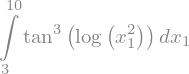

In [14]:
f = tan(ln(x1**2))**3 / x1

integrand = simplify(tan(ln(x1**2))**3)

F = integrate(integrand, (x1,a,b))
F

Vi kan i stedet finde stam funktionen, og selv indsætte grænserne

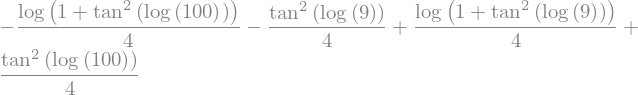

In [15]:
F = integrate(f, x1)

F.subs(x1, b) - F.subs(x1, a)

### .doit()

Hvis `SymPy` giver et output hvor integrationen ikke bliver udført, kan man i nogle tilfælde tvinge `SymPy` til at evaluere integralet med 

\begin{equation*}
\verb|intragte(f, (x,a,b)).doit()|
\end{equation*}

Man kan dog risikere at dette giver en fejl, og så må man anvende de andre metoder.

## Numeriske metoder

Man kan I nogle tilfælde risikere at `SymPy` enten bruger utrolig lang tid, eller slet ikke kan finde en løsning på et integral, selvom man har hjulpet så meget som man kan. I disse tilfælde kan man blive nødsaget til at løse integralet numerisk. Disse metoder kræver de numeriske libraries `numpy`og `scipy`. I har brugt dem i Mat1, Fysik og Programmering, og `dtumathtools` installerer automatisk `numpy`. Hvis I ikke har installeret `scipy`, kan det gøres ved:

```{code}
conda install scipy
```

eller hvis man bruger `pip`

```{code}
pip install scipy
```

In [16]:
# quad er en numerisk integrator til funktioner af en variabel
# nquad er en numerisk integrator til funktioner af flere variable
from scipy.integrate import quad, nquad
import numpy as np

Her kommer hhv et eksempel på en numerisk løsning i en og to dimensioner.

### En dimension

Lad os kigge på integralet

\begin{equation*}
\int_{\pi}^{10} \frac{\tan^3(\ln(x^2))}{x} dx.
\end{equation*}

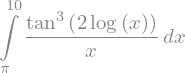

In [17]:
f1 = tan(ln(x**2))**3 / x

# Bemærk: SymPy vil ikke bestemme det begrænsede integral
integrate(f1, (x,pi,10))

Dette er et af de tilfælde hvor `SymPy` godt kan finde en analytisk løsning, hvis bare vi hjælper lidt, men lad os starte med at løse integralet numerisk.

Først skal vi have konverteret $f_1$ til en python-/lambdafunktion. Dette gøres med funktionen `lambdify` og svarer løst sagt til at vi definerer $f_1$ ved `def f1(x):`

In [18]:
f1_num = lambdify(x, f1, 'numpy')

# Nu kan vi give f1_num en numerisk værdi og få en numerisk værdi tilbage
f1_num(3)

Nu kan `quad` bruges til at bestemme integralet

In [19]:
F1_num, error1 = quad(f1_num, np.pi, 10)
F1_num, error1

Funktionen `quad` giver to outputs. Den numeriske approksimation af integralet, og en estimeret fejl (afvigelsen) fra den egentlige løsning.

Vi kan prøve at sammenligne dette med den analytiske løsning. Først kan vi forsøge at tvinge sympy til at evaluere integralet med $\verb|.doit()|$, men det giver bare en fejl:

In [20]:
# Fjern # for at selv at se fejlen. Maple

# integrate(f1, (x, pi, 10)).doit()

I stedet kan vi få `SymPy` til at bestemme stamfunktionen, og derefter selv bestemme det bestemte integral

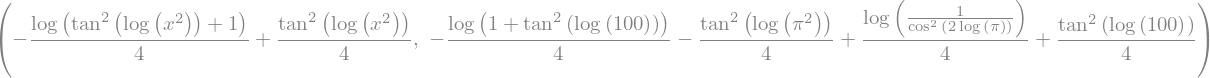

In [21]:
# ad: anti-derivative
F1_ad = integrate(f1, x)
F1_analytic = trigsimp(F1_ad.subs(x,10) - F1_ad.subs(x,pi))
F1_ad, F1_analytic

Lad os sammenligne de to resultater

In [22]:
F1_analytic.evalf() - F1_num

Den numeriske løsning giver altså en god approksimation, men de to resultater er ikke helt ens. Bemærk at den faktiske fejl `quad` begår er mindre end den estimerede fejl på $3.4 \cdot 10^{−11}$. Det er jo godt.

### To dimensioner

Lad os kigge på udtrykket

\begin{equation*}
\int_{0}^{\pi}\int_{-10}^{20} \sin(x)\cdot y^2\: dy dx.
\end{equation*}

Her har `SymPy` ingen problemer med at finde en løsning, så vi kan let sammenligne den analytiske og numeriske metode.

In [23]:
x,y = symbols('x y', real = True)

f2 = sin(x)*y**2

F2_analytic = integrate(f2, (y,-10,20), (x,0,pi))
F2_analytic

For at evaluere integralet numerisk skal vi igen konvertere $f_2$, med `lambdify`.

In [24]:
f2_num = lambdify((x,y), f2, 'numpy')   # lambdify kan tage flere variable

# Nu er f2_num en numerisk funktion af to variable
f2_num(3,4)

Nu kan integralet bestemmes vha `nquad`. For en funktion af n variable kaldes `nquad` ved:

\begin{equation*}
\verb|nquad(func, [[range for var_1], [range for var_2], ..., [range for var_n]]|)
\end{equation*}

In [25]:
F2_num, error2 = nquad(f2_num, [[0, np.pi], [-10,20]])
F2_num, error2

De to metode kan nu sammenlignes

In [26]:
F2_num - F2_analytic